In [0]:
#lab 5
#J.Czaja, nr indeksu 5954


In [0]:
# Zadanie 1:
# Wyjaśnij w kilku zdaniach jaka cecha została wywnioskowana przez PCA i co ona intuicyjnie mogłaby oznaczać

#Analiza głównych składowych (ang. principal component analysis, PCA) jako jedna ze statystycznych metod
# analizy czynnikowej, pozwoliło na ustalenie, że z punktu widzenia zastosowanej metody, największa
# zneczenie ma "Petal length". Badany zbiór, złożony z danych o irysach, pozwala w ten sposób
# na określenie, że długość płatków kwiatu odgrywa największe znaczenie.
# Na otrzymanym wykresie objawia się to wyraźnym wyizolowaniem badanej klasy.

In [0]:
# Zadanie bonus: przeprowadź dekompozycję PCA na wybranym przez siebie innym zbiorze danych
#WYBIERAMY ZBIOR WIN DO BADANIA  za pomoca PCA
from sklearn.datasets import load_wine
dataset = load_wine()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [21]:
# Podział zestawu danych na zestaw szkoleniowy i testowy
X = dataset.data
y = dataset.target
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
 
# Skalowanie funkcji
#  Dopasowanie i przetwarzania wstępne danych
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 
 
# Zastosowanie funkcji PCA do zestawu danych uczacych  i testowych
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 
 
#  Dopasowanie regresji logistycznej do danych uczacych
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

# Przewidywanie wyniku zestawu testów za pomocą
# funkcja przewidywania poprzez LogisticRegression
y_pred = classifier.predict(X_test) 

# Tworzenie confusion matrix między zestaw testowmy Y i przewidywana wartoscia

from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


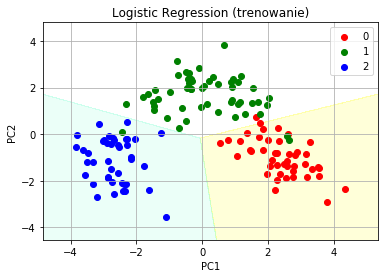

In [24]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Przewidywanie wyniku zestawu treningowego
# Prognozowanie zestawu treningowego, wynik poprzez wykres rozproszenia
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (trenowanie)') 
plt.xlabel('PC1') 
plt.ylabel('PC2') 

plt.legend(scatterpoints=1)
plt.grid()
plt.show() 

 